# Linear Support Vector Classifier

In [17]:
# Import packages
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import numpy as np

In [34]:
# Load data into a dataset
df = pd.read_csv("mbit_preprocessed_features.csv", index_col=0)
display(df.head())

,type,posts,encodedType,preprocessed_posts,extro_intro,intu_obs,feel_think,prosp_judg,avg_word_count,avg_exclam_count,avg_fullstop_count,avg_emoji_count,avg_count_of_hello,avg_count_of_hi,avg_count_of_extroverted_bigrams,avg_count_of_extroverted_stylistic_impressions,avg_count_of_interoverted_quantifiers,avg_count_of_introverted_first_person_singular_pronoun,avg_count_of_introverted_negations
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,8,"['youtube', 'tumblr', 'enfp', 'intj', 'moment'...",0,1,1,0,12.10,0.0,0.16,0.08,0.0,0.0,0.14,0.0,0.06,3.54,0.02
1,ENTP,'I'm finding the lack of me in these posts ver...,3,"['im', 'finding', 'the', 'lack', 'of', 'post',...",1,1,0,1,24.38,0.0,0.04,0.08,0.0,0.0,0.28,0.0,0.14,5.58,0.10
2,INTP,'Good one _____ https://www.youtube.com/wat...,11,"['good', 'one', 'youtube', 'of', 'course', 'i'...",0,1,0,1,17.70,0.0,0.08,0.00,0.0,0.0,0.26,0.0,0.00,5.18,0.04
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",10,"['dear', 'intp', 'i', 'enjoyed', 'conversation...",0,1,0,0,22.26,0.0,0.14,0.02,0.0,0.0,0.20,0.0,0.10,6.12,0.10
4,ENTJ,'You're fired.|||That's another silly misconce...,2,"['youre', 'fired', 'thats', 'another', 'silly'...",1,1,0,0,20.32,0.0,0.08,0.06,0.0,0.0,0.14,0.0,0.00,6.10,0.10


In [7]:
# Create the train/test split
def create_train_test_split(X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42069)
    return X_train, X_test, Y_train, Y_test

# Train the model and print the classification report
def train_predict_model(X, Y, types, show_matrix):
    X_train, X_test, Y_train, Y_test = create_train_test_split(X, Y)
    
    # Train the model
    estimator = LinearSVC()

    estimator.fit(X_train, Y_train)
    
    # Prediction
    predicted = estimator.predict(X_test)
    
    # Evaluation
    print("Classification Report:")
    print(classification_report(Y_test, predicted, target_names=types, zero_division=0))
    
    if show_matrix:
        cnf_matrix = confusion_matrix(Y_test, predicted)
        np.set_printoptions(precision=2)
        plot_confusion_matrix(cnf_matrix, classes=types)
        
    return predicted

# Plot the confusion matrix (copied from Exercise 3)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [8]:
# Loads input data from dataset and vectorizes it
X = df.iloc[:, 3].values #Preprocessed_posts

# Create vectorizer
vectorizer = TfidfVectorizer()
matrix = vectorizer.fit_transform(X)
X = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names_out())

print("Vectorizer created {} features.".format(len(vectorizer.get_feature_names_out())))

Vectorizer created 140798 features.


### Multi-class model

Classification Report:
              precision    recall  f1-score   support

        ENFJ       0.48      0.24      0.32        55
        ENFP       0.69      0.62      0.65       212
        ENTJ       0.79      0.45      0.57        74
        ENTP       0.64      0.62      0.63       196
        ESFJ       0.67      0.36      0.47        11
        ESFP       0.00      0.00      0.00        14
        ESTJ       0.50      0.09      0.15        11
        ESTP       0.82      0.32      0.46        28
        INFJ       0.65      0.69      0.67       436
        INFP       0.64      0.83      0.72       545
        INTJ       0.66      0.59      0.62       365
        INTP       0.66      0.77      0.71       378
        ISFJ       0.79      0.53      0.64        58
        ISFP       0.67      0.40      0.50        73
        ISTJ       0.71      0.49      0.58        61
        ISTP       0.71      0.58      0.64        86

    accuracy                           0.66      2603
   

array([ 0, 11, 11, ...,  1, 10, 11], dtype=int64)

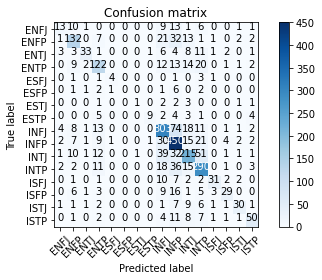

In [35]:
# Multi-class model
Y_multi = df.iloc[:, 2].values
types = sorted(list(set(df.iloc[:, 0].values)))

train_predict_model(X, Y_multi, types, True)

### Binary model: Introverted-Extroverted

Classification Report:
              precision    recall  f1-score   support

 Introverted       0.87      0.96      0.91      2002
 Extroverted       0.78      0.51      0.62       601

    accuracy                           0.85      2603
   macro avg       0.83      0.73      0.76      2603
weighted avg       0.85      0.85      0.84      2603



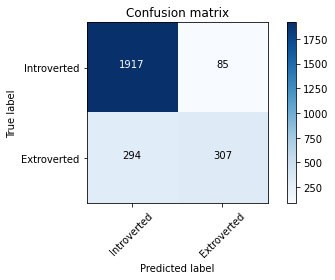

In [10]:
# Binary: Introverted-Extroverted
Y_intro = df.iloc[:, 4].values

predicted_intro = train_predict_model(X, Y_intro, ['Introverted', 'Extroverted'], True)

### Binary model: Sensing-Intuition

Classification Report:
              precision    recall  f1-score   support

     Sensing       0.78      0.34      0.47       342
   Intuition       0.91      0.99      0.95      2261

    accuracy                           0.90      2603
   macro avg       0.84      0.66      0.71      2603
weighted avg       0.89      0.90      0.88      2603



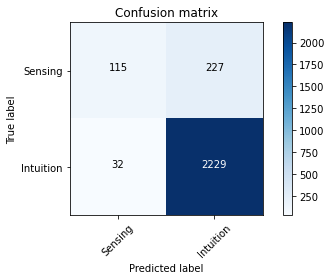

In [11]:
# Binary: Sensing-Intuition
Y_sensi = df.iloc[:, 5].values

predicted_sensi = train_predict_model(X, Y_sensi, ['Sensing', 'Intuition'], True)

### Binary model: Thinking-Feeling

Classification Report:
              precision    recall  f1-score   support

    Thinking       0.84      0.82      0.83      1199
     Feeling       0.85      0.87      0.86      1404

    accuracy                           0.85      2603
   macro avg       0.85      0.85      0.85      2603
weighted avg       0.85      0.85      0.85      2603



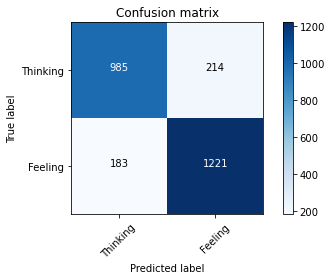

In [12]:
# Binary: Thinking-Feeling
Y_think = df.iloc[:, 6].values

predicted_think = train_predict_model(X, Y_think, ['Thinking', 'Feeling'], True)

### Binary model: Judging-Perceiving

Classification Report:
              precision    recall  f1-score   support

     Judging       0.79      0.63      0.70      1071
  Perceiving       0.77      0.88      0.82      1532

    accuracy                           0.78      2603
   macro avg       0.78      0.76      0.76      2603
weighted avg       0.78      0.78      0.77      2603



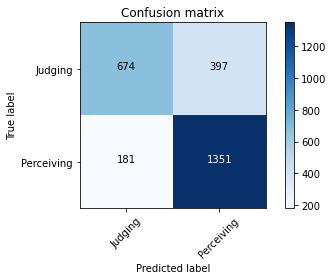

In [13]:
# Judging-Perceiving
Y_judgi = df.iloc[:, 7].values

predicted_judgi = train_predict_model(X, Y_judgi, ['Judging', 'Perceiving'], True)

### Combining binary models to estimate MBTI

In [28]:
# Get actual types of test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_multi, test_size=0.3, random_state=42069)

# Create dataframe
df1 = df[['encodedType', 'extro_intro', 'intu_obs', 'feel_think', 'prosp_judg']].drop_duplicates().reset_index(drop=True)

predict_df = pd.DataFrame(np.transpose([predicted_intro, predicted_sensi, predicted_think, predicted_judgi]), 
                         columns =['extro_intro', 'intu_obs', 'feel_think', 'prosp_judg'])
predict_df = predict_df.merge(df1, how = 'left', on = predict_df.columns.tolist())
predict_df['acutalType'] = Y_test
display(predict_df)

,extro_intro,intu_obs,feel_think,prosp_judg,encodedType,acutalType
0,1,1,1,0,0,0
1,0,0,0,1,15,11
2,0,1,0,1,11,2
3,0,1,0,1,11,11
4,0,1,0,0,10,10
...,...,...,...,...,...,...
2598,0,1,0,1,11,11
2599,0,1,0,1,11,11
2600,1,1,1,1,1,8
2601,0,1,0,0,10,10


Classification Report:
              precision    recall  f1-score   support

        ENFJ       0.23      0.16      0.19        55
        ENFP       0.64      0.48      0.54       212
        ENTJ       0.41      0.22      0.28        74
        ENTP       0.60      0.43      0.50       196
        ESFJ       0.40      0.18      0.25        11
        ESFP       0.00      0.00      0.00        14
        ESTJ       0.00      0.00      0.00        11
        ESTP       0.57      0.14      0.23        28
        INFJ       0.62      0.55      0.58       436
        INFP       0.57      0.80      0.66       545
        INTJ       0.55      0.51      0.53       365
        INTP       0.47      0.72      0.57       378
        ISFJ       0.65      0.38      0.48        58
        ISFP       0.33      0.18      0.23        73
        ISTJ       0.60      0.15      0.24        61
        ISTP       0.58      0.30      0.40        86

    accuracy                           0.55      2603
   

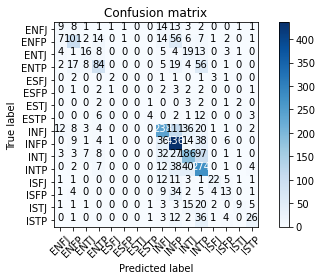

In [36]:
# Evaluation
print("Classification Report:")
print(classification_report(Y_test, predict_df['encodedType'], target_names=types, zero_division=0))

cnf_matrix = confusion_matrix(Y_test, predict_df['encodedType'])
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=types)